In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [3]:
traffic = pd.read_csv('../Transportation/NM_VMTbyRoadSegment_byVehicleType_2018_April2020.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../Transportation/NM_VMTbyRoadSegment_byVehicleType_2018_April2020.csv'

In [ ]:
traffic.head()

In [16]:
cols = traffic.columns

In [17]:
vmt_cols = cols[cols.str.contains('VMT')]
vmt_cols = list(vmt_cols)
print(vmt_cols)

['VMT_MC_Class 1', 'VMT_PC_Class 2', 'VMT_LT_Class 3', 'VMT_Bus_Class 4', 'VMT_SU_Class 5', 'VMT_SU_Class 6', 'VMT_SU_Class 7', 'VMT_CT_Class 8', 'VMT_CT_Class 9', 'VMT_CT_Class 10', 'VMT_CT_Class 11', 'VMT_CT_Class 12', 'VMT_CT_Class 13']


In [18]:
print(traffic)

              Route  Beg_MP     End_MP     Length   LOCAL_ID  FUNCCODE  \
0          BIA1001P     0.0   4.365095   4.365095  3700901.0       6.0   
1          BIA1004P     0.0   2.741813   2.741813    50917.0       6.0   
2            BIA10P     0.0  13.297981  13.297981    21302.0       6.0   
3           BIA110P     0.0   2.725038   2.725038    21302.0       6.0   
4             BIA1P     0.0   1.304494   1.304494    51634.0       6.0   
...             ...     ...        ...        ...        ...       ...   
80708  USX84P182.0T     0.0   0.285976   0.285976    27510.0       3.0   
80709  USX84P182.0U     0.0   0.138115   0.138115    27511.0       3.0   
80710  USX84P183.0A     0.0   0.224021   0.224021    51435.0       3.0   
80711  USX84P183.0G     0.0   0.216660   0.216660    51436.0       3.0   
80712  USX84P183.0T     0.0   0.349929   0.349929    51437.0       3.0   

      POP_CODE  AADT  AADT_MC_Class 1  AADT_PC_Class 2  ...  VMT_Bus_Class 4  \
0            R   340           

In [19]:
traffic['FUNCCODE'].replace({1.0: 'Interstate', 2.0: 'Freeway/Expressway', 3.0: 'Other Principal Arterial', 4.0: 'Minor Arterial', 5.0: 'Major Collector', 6.0: 'Minor Collector', 7.0: 'Local Road or Street'}, inplace=True)

In [20]:
traffic = traffic.sum()

In [21]:
traffic = traffic[vmt_cols]

In [22]:
traffic

VMT_MC_Class 1      1.3717e+06
VMT_PC_Class 2     4.06464e+07
VMT_LT_Class 3     1.26395e+07
VMT_Bus_Class 4         351811
VMT_SU_Class 5      1.8133e+06
VMT_SU_Class 6          448976
VMT_SU_Class 7          136751
VMT_CT_Class 8          751211
VMT_CT_Class 9     2.30576e+06
VMT_CT_Class 10         231656
VMT_CT_Class 11         123618
VMT_CT_Class 12         360815
VMT_CT_Class 13         271382
dtype: object

In [23]:
#traffic.columns = [column.replace('VMT_','') for column in traffic]

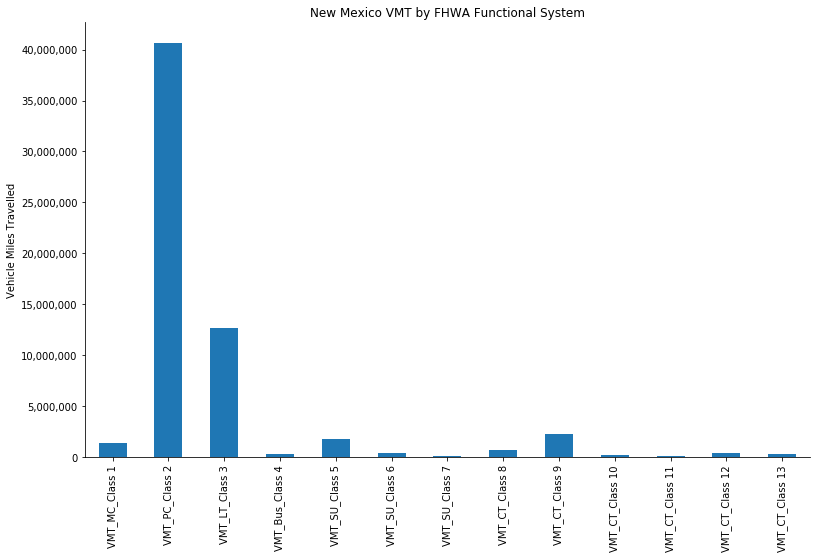

In [24]:
fig, ax = plt.subplots()
traffic.plot(kind='bar', stacked = True, figsize=(13,8),ax=ax)
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel('')
ax.set_ylabel('Vehicle Miles Travelled')
ax.set_title('New Mexico VMT by FHWA Functional System')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

fig.savefig(('figures/nm_vmt_byfuncsystem.pdf'), bbox_inches='tight', transparent=True,dpi=800)
